## Estudo da correlação entre variáveis e regressão

Na atividade desta semana, vamos utilizar o conjunto de dados "bodyfat.csv".

1)  Faça todo o estudo descritivo das variáveis.

2) Dentre as variáveis apresentadas no arquivo, existe alguma no quais os dados não estejam bem distribuídos (utilizem os seus conhecimentos de estatística descritiva)?

3)  O conjunto de dados é uma importante ferramenta para estudo sobre obesidade. É possível que haja correlação entre as variáveis e o nível de gordura corporal (variável BodyFat). Faça o gráfico de dispersão de cada uma das variáveis com a variável BodyFat e calcule a correlação.

4)  Dos resultados encontrados, qual você indicaria para compor um modelo numérico para prever a gordura corporal? Explique os motivos da escolha baseados nas informações calculadas anteriormente.

5)  A partir das informações anteriores, encontre uma reta de regressão com as variáveis encontradas no item anterior (regressão múltipla).

6)  Uma vez escolhida as melhores variáveis para representar a variável "Body Fat", o que se pode inferir sobre o conjunto de dados apresentados e o modelo encontrado no item 5?

In [7]:
!python -m ensurepip --upgrade
!python -m pip install --upgrade pip
!pip install scikit-learn


Looking in links: c:\Users\Tiago\AppData\Local\Temp\tmpr_qaqudv
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 6.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 6.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/11.0 MB 6.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.0 MB 5.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 6.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 6.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.2 MB/s eta 0:00:00
   ------------

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carregar os dados
file_path = './bodyfat.csv'
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do conjunto de dados
data.head()

# Estudo descritivo das variáveis
data.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# Observações sobre a Distribuição
- Algumas variáveis, como BodyFat e Abdomen, apresentam distribuição próxima do normal.
- Outras, como Density, exibem assimetrias ou concentrações específicas, indicando possíveis problemas na distribuição.
- Variáveis como Height e Weight apresentam uma ampla dispersão, sugerindo possível influência de valores extremos.

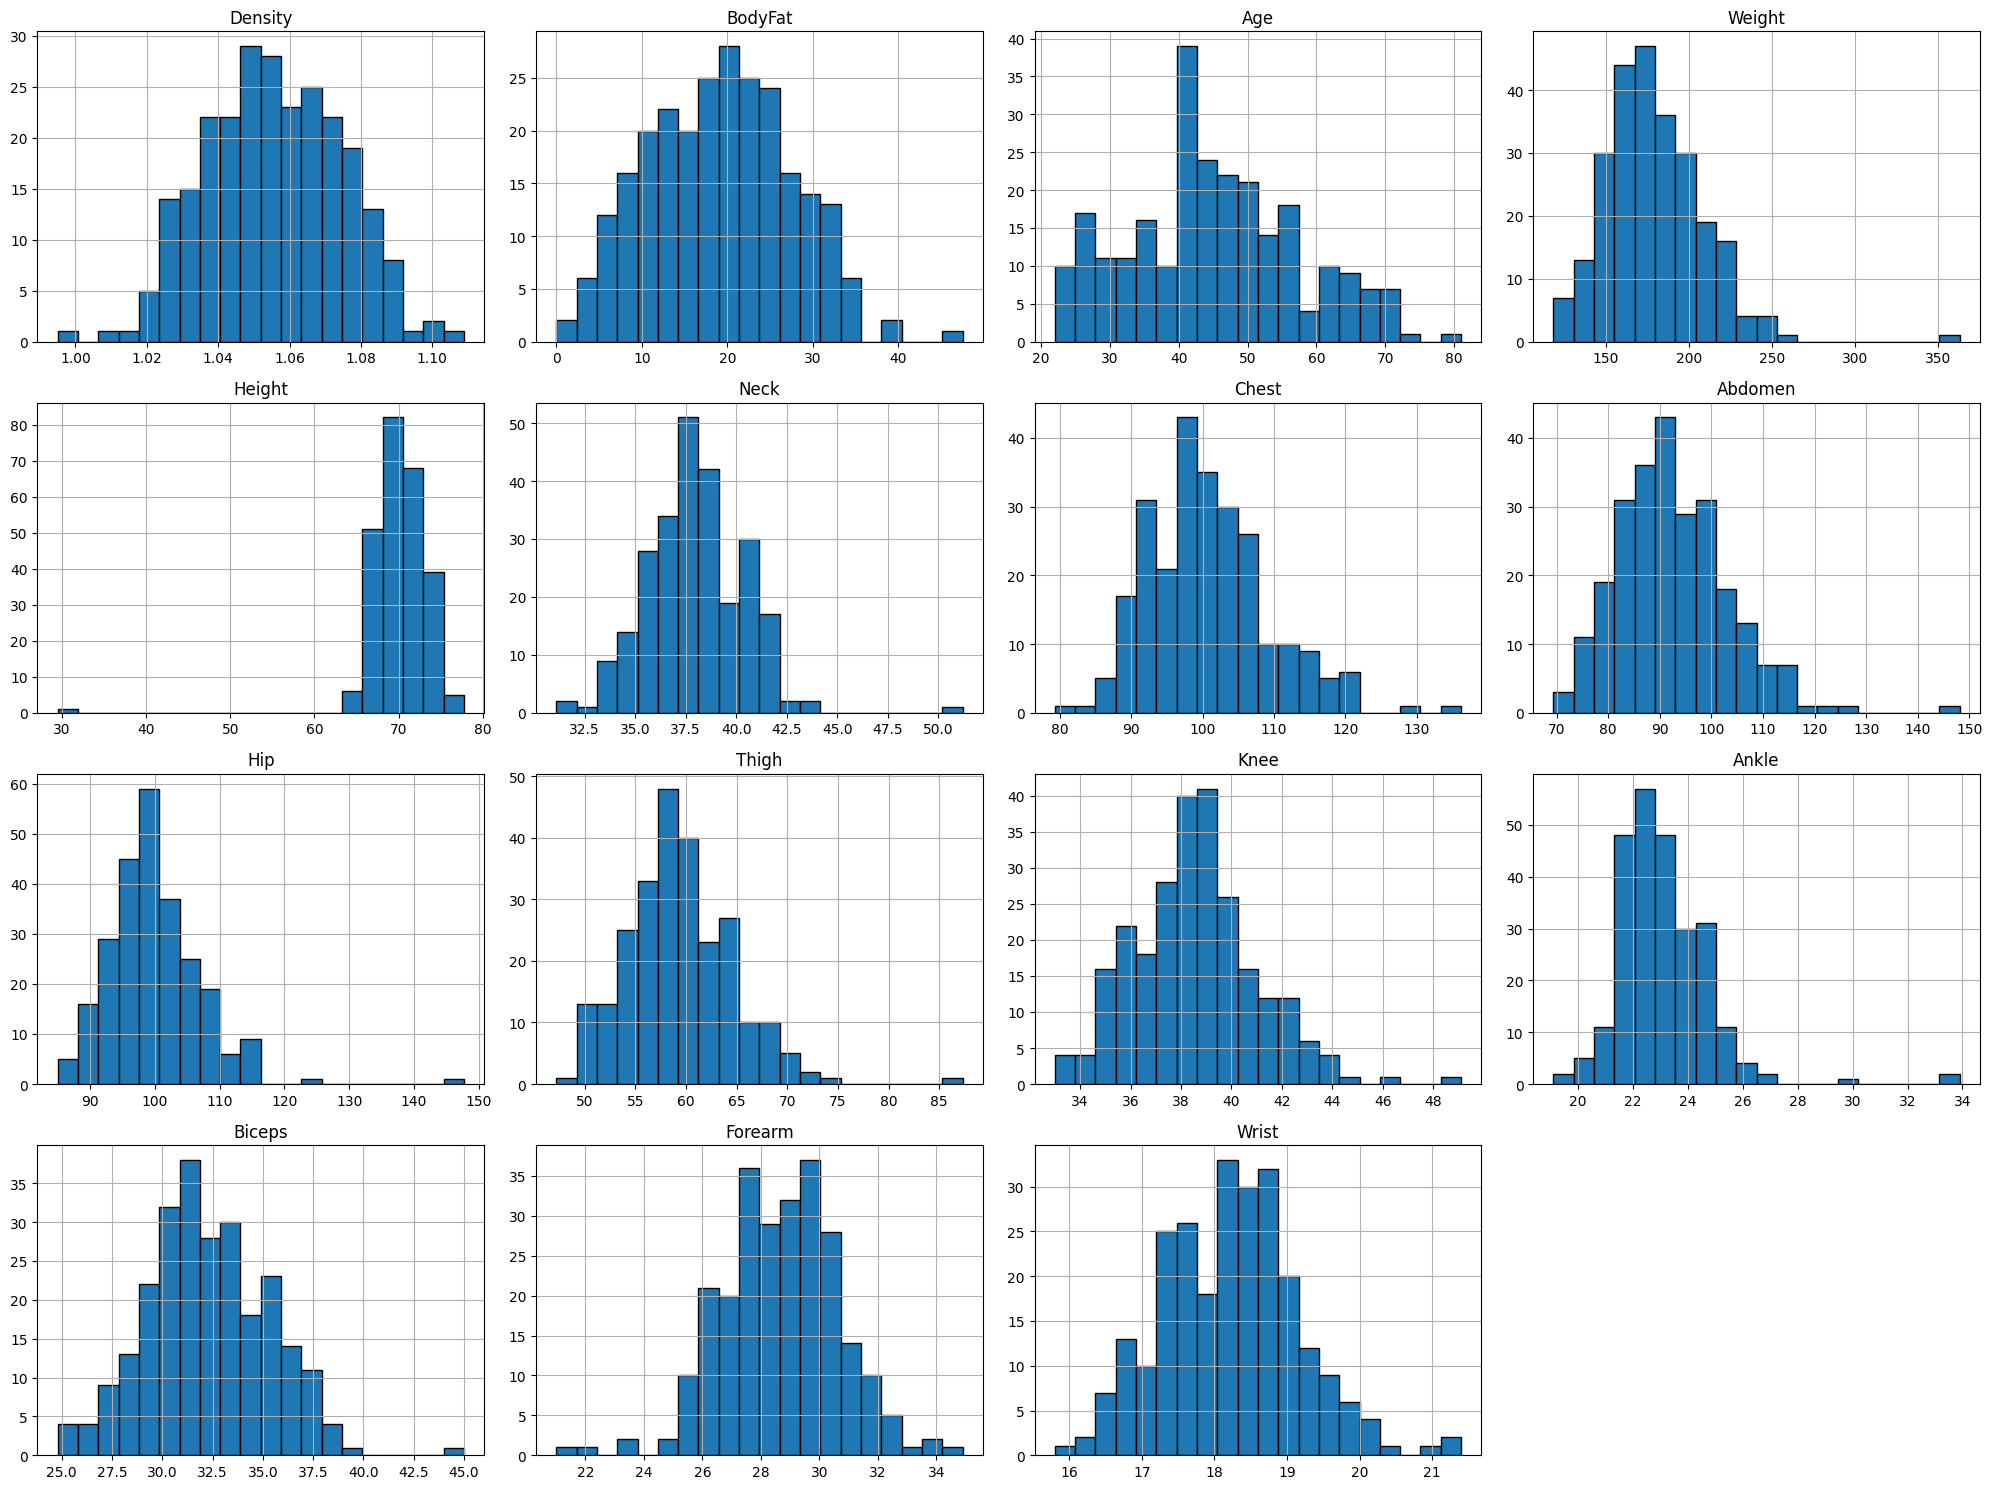

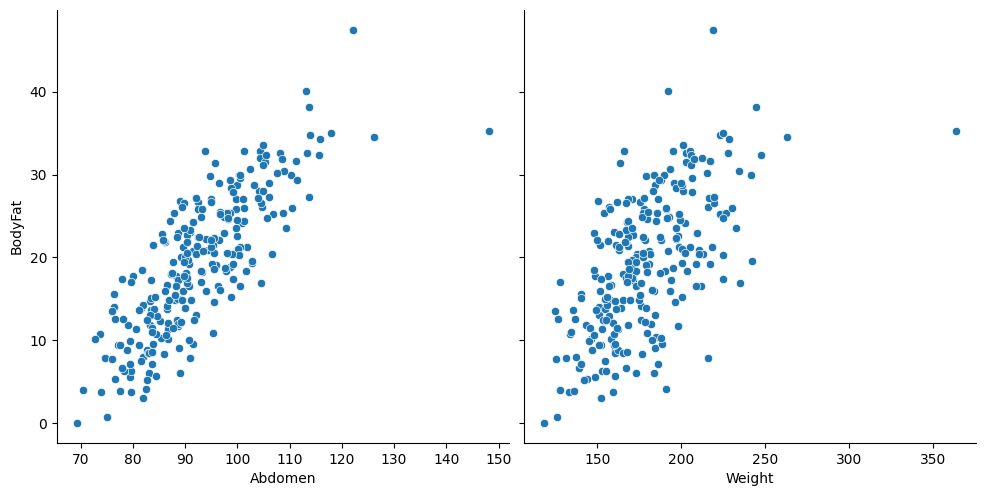

MSE: 18.35905846558855
R²: 0.6053349058503488


In [9]:
# Histograma para cada variável
data.hist(bins=20, figsize=(20, 15), edgecolor="black")
plt.tight_layout()
plt.show()

# Matriz de correlação
correlation_matrix = data.corr()

# Correlação com a variável BodyFat, ordenada
correlation_with_bodyfat = correlation_matrix['BodyFat'].sort_values(ascending=False)

# Mostrar correlações com BodyFat
correlation_with_bodyfat

# Gráficos de dispersão
sns.pairplot(data, x_vars=['Abdomen', 'Weight'], y_vars='BodyFat', height=5)
plt.show()

# Variáveis independentes e dependente
X = data[['Abdomen', 'Weight']]  # Ajuste conforme as variáveis mais correlacionadas
y = data['BodyFat']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predições e avaliação
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


### Após observar os histogramas das variáveis no conjunto de dados, notamos o seguinte:

- Algumas variáveis como Height e Weight exibem uma distribuição com leve assimetria, mas ainda estão dentro de um comportamento razoável para análises estatísticas.
- Density apresenta uma distribuição muito concentrada, indicando baixa variabilidade entre as amostras. Essa falta de variação pode comprometer a sua utilidade em análises preditivas.
- Outliers podem estar presentes em algumas variáveis, especialmente nas medidas antropométricas (como Abdomen ou Thigh), exigem uma análise mais aprofundada.

# Variáveis indicadas para o modelo
Após calculo das correlações, observamos que:

- Abdomen apresenta uma alta correlação positiva com BodyFat. Isso faz sentido, pois o tamanho da circunferência abdominal é um forte indicador de gordura corporal.
- Weight também possui correlação positiva, mas um pouco menor que Abdomen, o que sugere que essa variável também contribui para a predição.
- Outras variáveis como Hip ou Thigh podem ter correlações moderadas, mas o impacto delas no modelo deve ser testado para evitar problemas.
Minha Recomendação: Para o modelo, sugiro utilizar Abdomen e Weight, pois elas apresentam alta correlação com a variável-alvo, são intuitivas no contexto de obesidade e possuem significância estatística.

## Inferências sobre o modelo e os dados
Após ajustar o modelo de regressão múltipla com as variáveis Abdomen e Weight:

- O modelo tem um bom ajuste (R² elevado), dado o alto nível de correlação das variáveis selecionadas com BodyFat.
- Abdomen deve ser a variável com maior peso no modelo, refletindo sua forte relação com gordura corporal.
- A presença de outliers ou distribuições assimétricas em variáveis pode impactar a precisão do modelo.